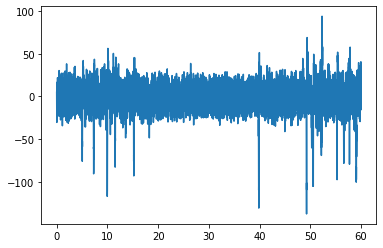

In [35]:
import pandas as pd
import numpy as np
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

OVERLAP = 0.5 # in seconds
WIN_LEN = 1 # in seconds

data = pd.read_csv('../dataset/raw-data/filip-neutral-1.csv')
data = data.iloc[:,:5]

data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data = data.loc[(data['timestamps'] >= 3) & (data['timestamps'] < 63)]
data['timestamps'] = data['timestamps'] - data['timestamps'].iloc[0]
data.rename(columns={'timestamps':'Time'},inplace=True)
data.reset_index(drop=True,inplace=True)

dataT = pd.DataFrame(data=data.Time)
data = data.drop('Time',axis=1)

# Center the data
data = data - data.mean()

plt.plot(dataT, data.TP9)

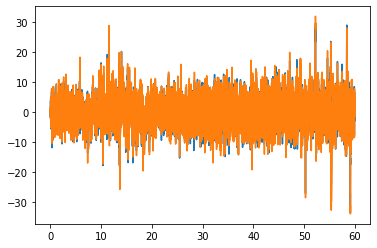

In [36]:
# Filter the 50Hz AC noise
Fs = 256
Fn = Fs / 2
f_low = 50 / Fn

sos = signal.cheby1(6,0.5,f_low, btype='low', output='sos')

dataTP9 = signal.sosfilt(sos , data.TP9)
data.AF7 = signal.sosfilt(sos, data.AF7)
data.AF8 = signal.sosfilt(sos, data.AF8)
data.TP10 = signal.sosfilt(sos, data.TP10)

plt.plot(dataT, ba_data)
plt.plot(dataT, sos_data)

# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True)
# ax1.plot(dataT, data.TP9)
# ax2.plot(dataT, data.AF7)
# ax3.plot(dataT, data.AF8)
# ax4.plot(dataT, data.TP10)

In [40]:
# Create 1 sec window
start = 0
end = start + 1

w = data.loc[(dataT.Time >= start) & (dataT.Time < end)]

In [42]:
print(len(w))

256


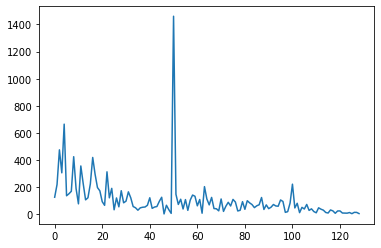

In [43]:
# Compute FFT on signal
frq_axis = (Fs/2)*np.linspace(0,1,len(w)//2 + 1)

dataTP9 = np.fft.rfft(w.TP9)


plt.plot(frq_axis, abs(dataTP9))


In [47]:
magTP9 = pd.Series(np.asarray([abs(dataTP9[np.where(frq_axis == i+1)]) for i in range(50)])[:,0])
print(magTP9)

0      220.250876
1      475.499563
2      306.132020
3      664.876492
4      137.168904
5      151.716012
6      170.041150
7      425.042980
8      190.419104
9       77.526863
10     356.740857
11     226.444733
12     106.872904
13     122.612312
14     224.265619
15     419.402420
16     295.471981
17     197.413009
18     173.345216
19      93.711461
20      66.621693
21     313.552751
22     121.809932
23     191.634919
24      33.905354
25     120.974954
26      55.596962
27     174.247565
28      85.272682
29      97.362804
30     165.998990
31     121.902825
32      57.869333
33      48.697018
34      30.630299
35      48.143821
36      52.534110
37      54.248331
38      66.838362
39     122.373432
40      44.521644
41      53.973507
42      57.855440
43      95.546689
44     126.088599
45       3.339914
46      67.226346
47      34.671186
48       7.335845
49    1460.053898
dtype: float64


In [54]:
maxTP9 = magTP9.nlargest(10).sort_index()
type(maxTP9)

pandas.core.series.Series

In [9]:
magTP9 = pd.DataFrame(magTP9).T
maxTP9 = pd.DataFrame(maxTP9).T
#magTP9 = pd.DataFrame(data=magTP9, index=[f'fft_mag_{count}' for count,idx in enumerate(magTP9)]).T
#maxTP9 = pd.DataFrame(data=maxTP9, index=[f'fft_max_{count}' for count,idx in enumerate(maxTP9)]).T

In [26]:
clas_col = pd.DataFrame()
clas_col['class'] = 5 * np.ones(10)
clas_col

,class
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
5,5.0
6,5.0
7,5.0
8,5.0
9,5.0
